In [3]:
# Librerias 
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
import matplotlib.pyplot as plt


In [8]:

# Carga de datos
df = pd.read_csv('Data.csv') 
stations = pd.read_csv('stations.csv')  

# Merge de data
df = df.merge(stations, left_on='Ciclo_Estacion_Retiro', right_on='id', how='left')
df.rename(columns={'lat': 'Lat_Retiro', 'lon': 'Lon_Retiro'}, inplace=True)
df = df.merge(stations, left_on='Ciclo_Estacion_Arribo', right_on='id', how='left')
df.rename(columns={'lat': 'Lat_Arribo', 'lon': 'Lon_Arribo'}, inplace=True)
df.drop(['id_x', 'id_y'], axis=1, inplace=True)  


C:\Users\denis\AppData\Local\Temp\ipykernel_34712\2936948048.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Data.csv')


In [9]:
df.isna().sum() 

Genero_Usuario             0
Edad_Usuario               0
Bici                       0
Ciclo_Estacion_Retiro      0
Fecha_Retiro               0
Hora_Retiro                0
Ciclo_Estacion_Arribo      0
Fecha_Arribo               0
Hora_Arribo                0
Lat_Retiro                 9
Lon_Retiro                 9
name_x                     9
Lat_Arribo               158
Lon_Arribo               158
name_y                   158
dtype: int64

In [15]:
df = df.dropna()
df.drop('name_y', axis=1, inplace=True)
df.rename(columns={'name_x': 'name'}, inplace=True)
df.isna().sum()

Genero_Usuario           0
Edad_Usuario             0
Bici                     0
Ciclo_Estacion_Retiro    0
Fecha_Retiro             0
Hora_Retiro              0
Ciclo_Estacion_Arribo    0
Fecha_Arribo             0
Hora_Arribo              0
Lat_Retiro               0
Lon_Retiro               0
name                     0
Lat_Arribo               0
Lon_Arribo               0
dtype: int64

In [18]:

# Convertir las columnas de tiempo a datetime
df['Tiempo_Retiro'] = pd.to_datetime(df['Fecha_Retiro'] + ' ' + df['Hora_Retiro'])
df['Tiempo_Arribo'] = pd.to_datetime(df['Fecha_Arribo'] + ' ' + df['Hora_Arribo'])
df['Duracion'] = (df['Tiempo_Arribo'] - df['Tiempo_Retiro']).dt.total_seconds() / 60

# Calculamos métricas por estación de retiro
df_features = df.groupby('Ciclo_Estacion_Retiro').agg({
    'Duracion': ['mean', 'count'],
    'Edad_Usuario': ['mean'],
    'Lat_Retiro': 'first',  
    'Lon_Retiro': 'first'
}).reset_index()

# Preparamos matriz
df_features.columns = ['Estacion', 'Duracion_Promedio', 'Total_Usos', 'Edad_Promedio', 'Latitud', 'Longitud']
features_matrix = df_features.iloc[:, 1:] 


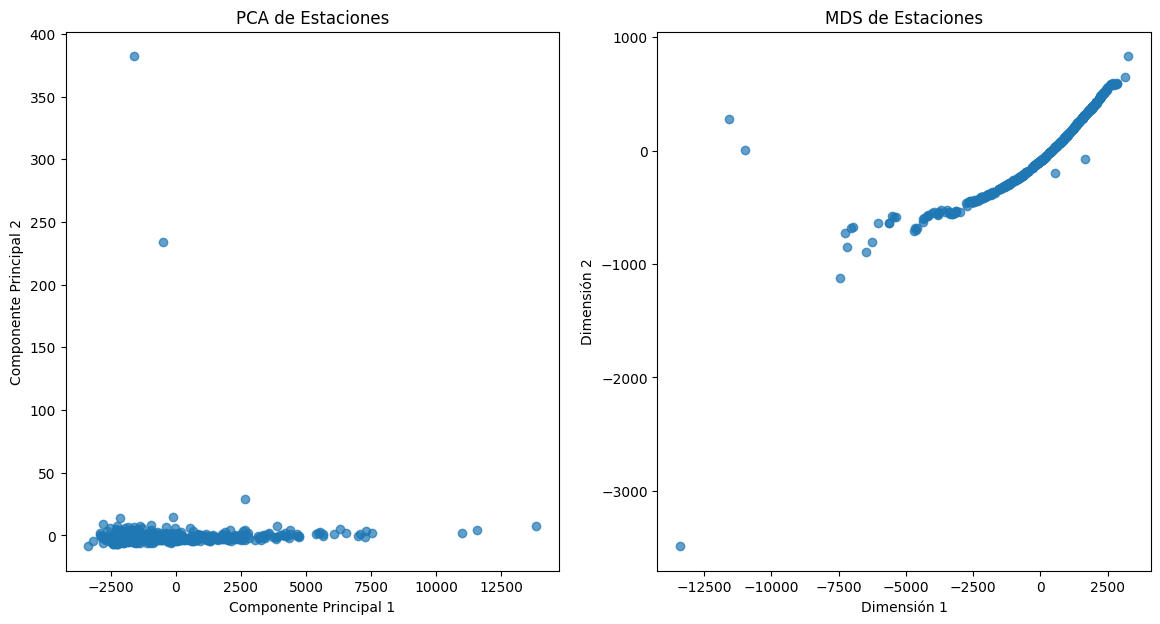

In [19]:

# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features_matrix)

# MDS
mds = MDS(n_components=2)
mds_result = mds.fit_transform(features_matrix)

# Visualización
plt.figure(figsize=(14, 7))

# Gráfico de PCA
plt.subplot(1, 2, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.7)
plt.title('PCA de Estaciones')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

# Gráfico de MDS
plt.subplot(1, 2, 2)
plt.scatter(mds_result[:, 0], mds_result[:, 1], alpha=0.7)
plt.title('MDS de Estaciones')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')

plt.show()
